In [ ]:
### 1. IMPORT LIBRARY PHYTON
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
### 2. MENGAMBIL KOLOM TERTENTU DI TABEL
#1. U,V,W, VdelE dari thick disk #ini pake kolom yang koreksi LSR
u_t, v_t, w_t, vdele_t = np.loadtxt("thick.csv", delimiter=",", usecols=(47,48,49,52), skiprows=1, unpack=True)
#2. U,V,W, VdelE dari thin disk
u_d, v_d, w_d, vdele_d = np.loadtxt("thin.csv", delimiter=",", usecols=(47,48,49,52), skiprows=1, unpack=True)
#3. U,V,W, VdelE dari halo
u_h, v_h, w_h, vdele_h = np.loadtxt("halo.csv", delimiter=",", usecols=(47,48,49,52), skiprows=1, unpack=True)

**HISTROGRAM DISTRIBUSI KECEPATAN U,V,W**

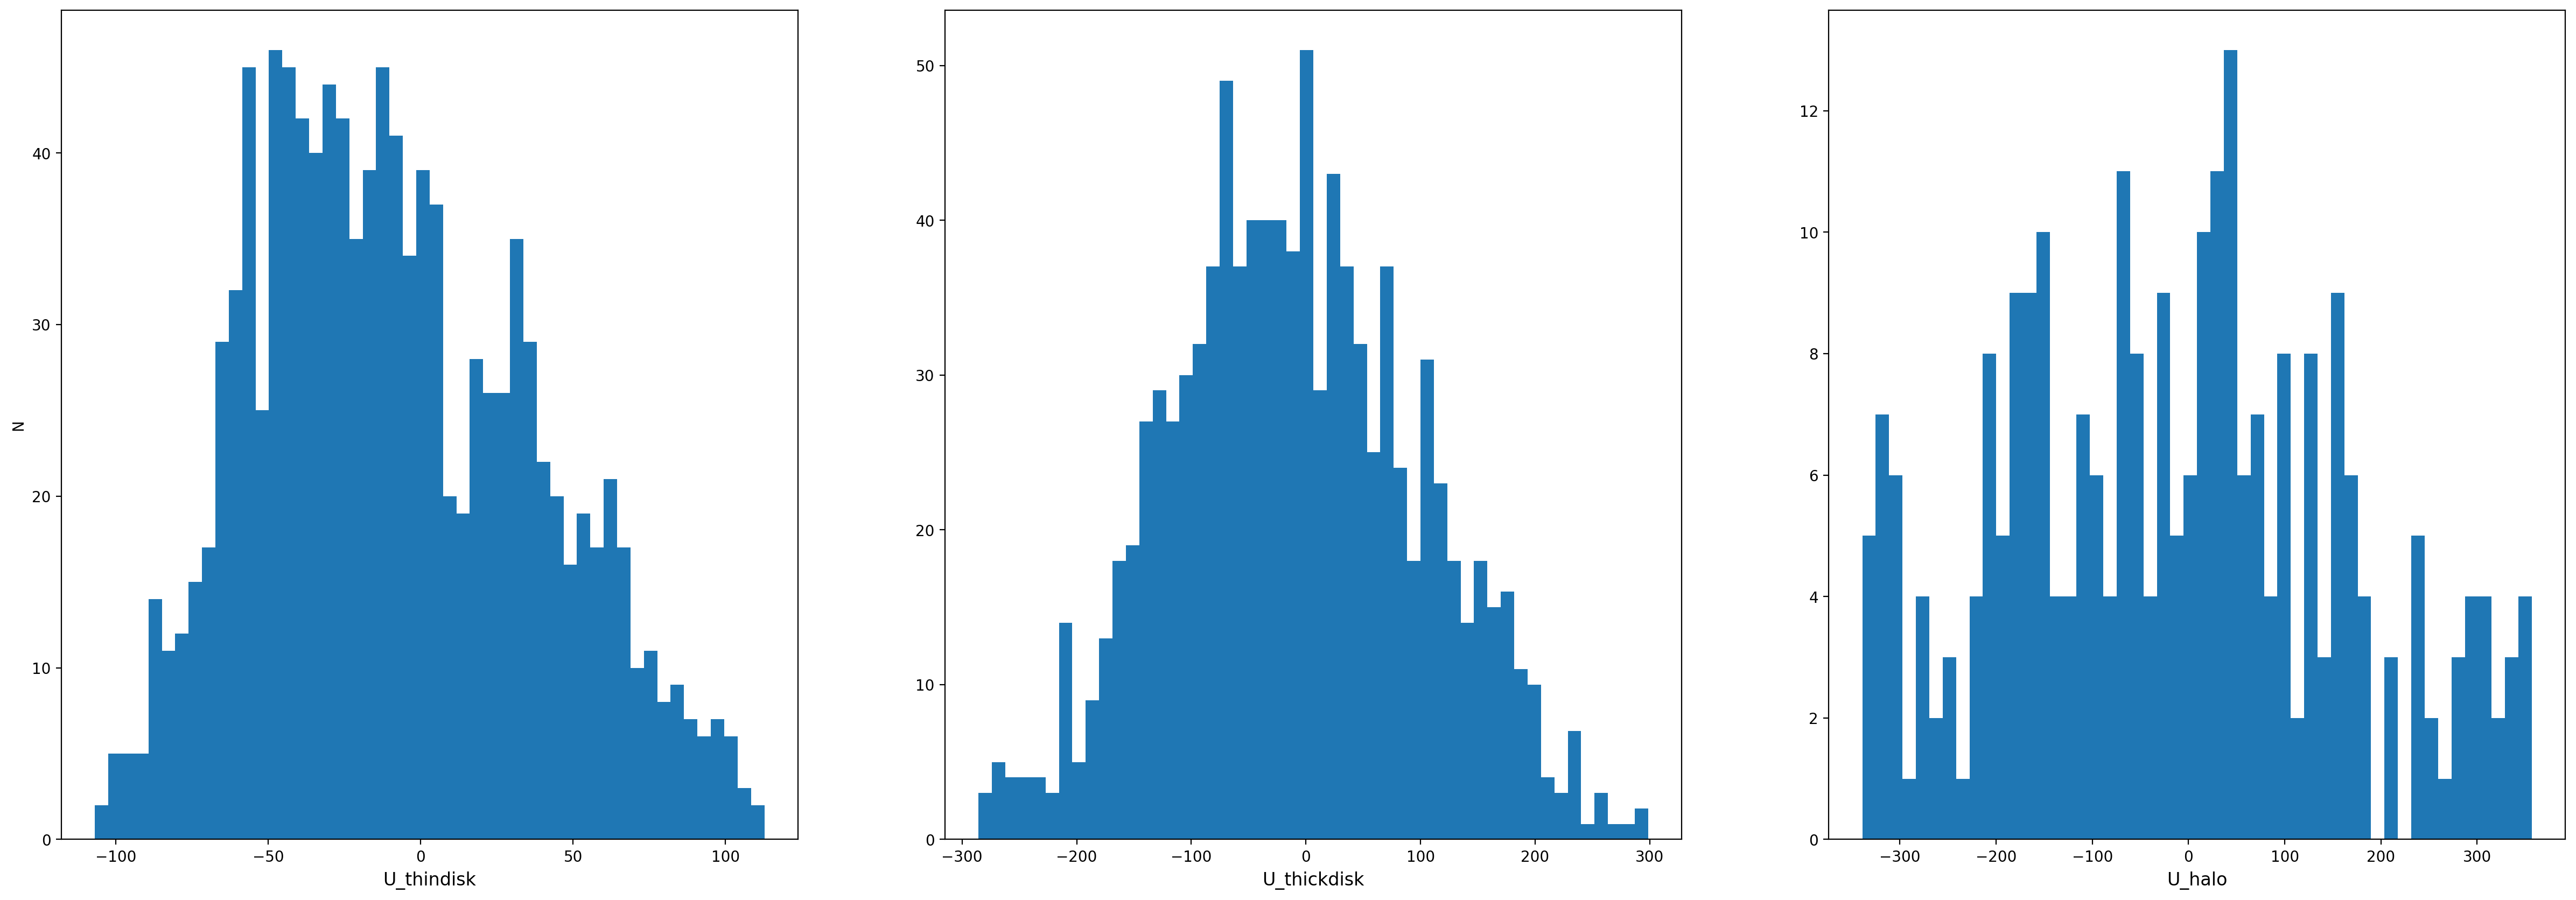

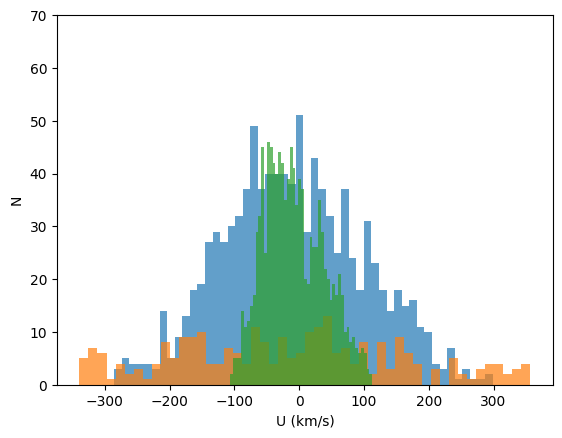

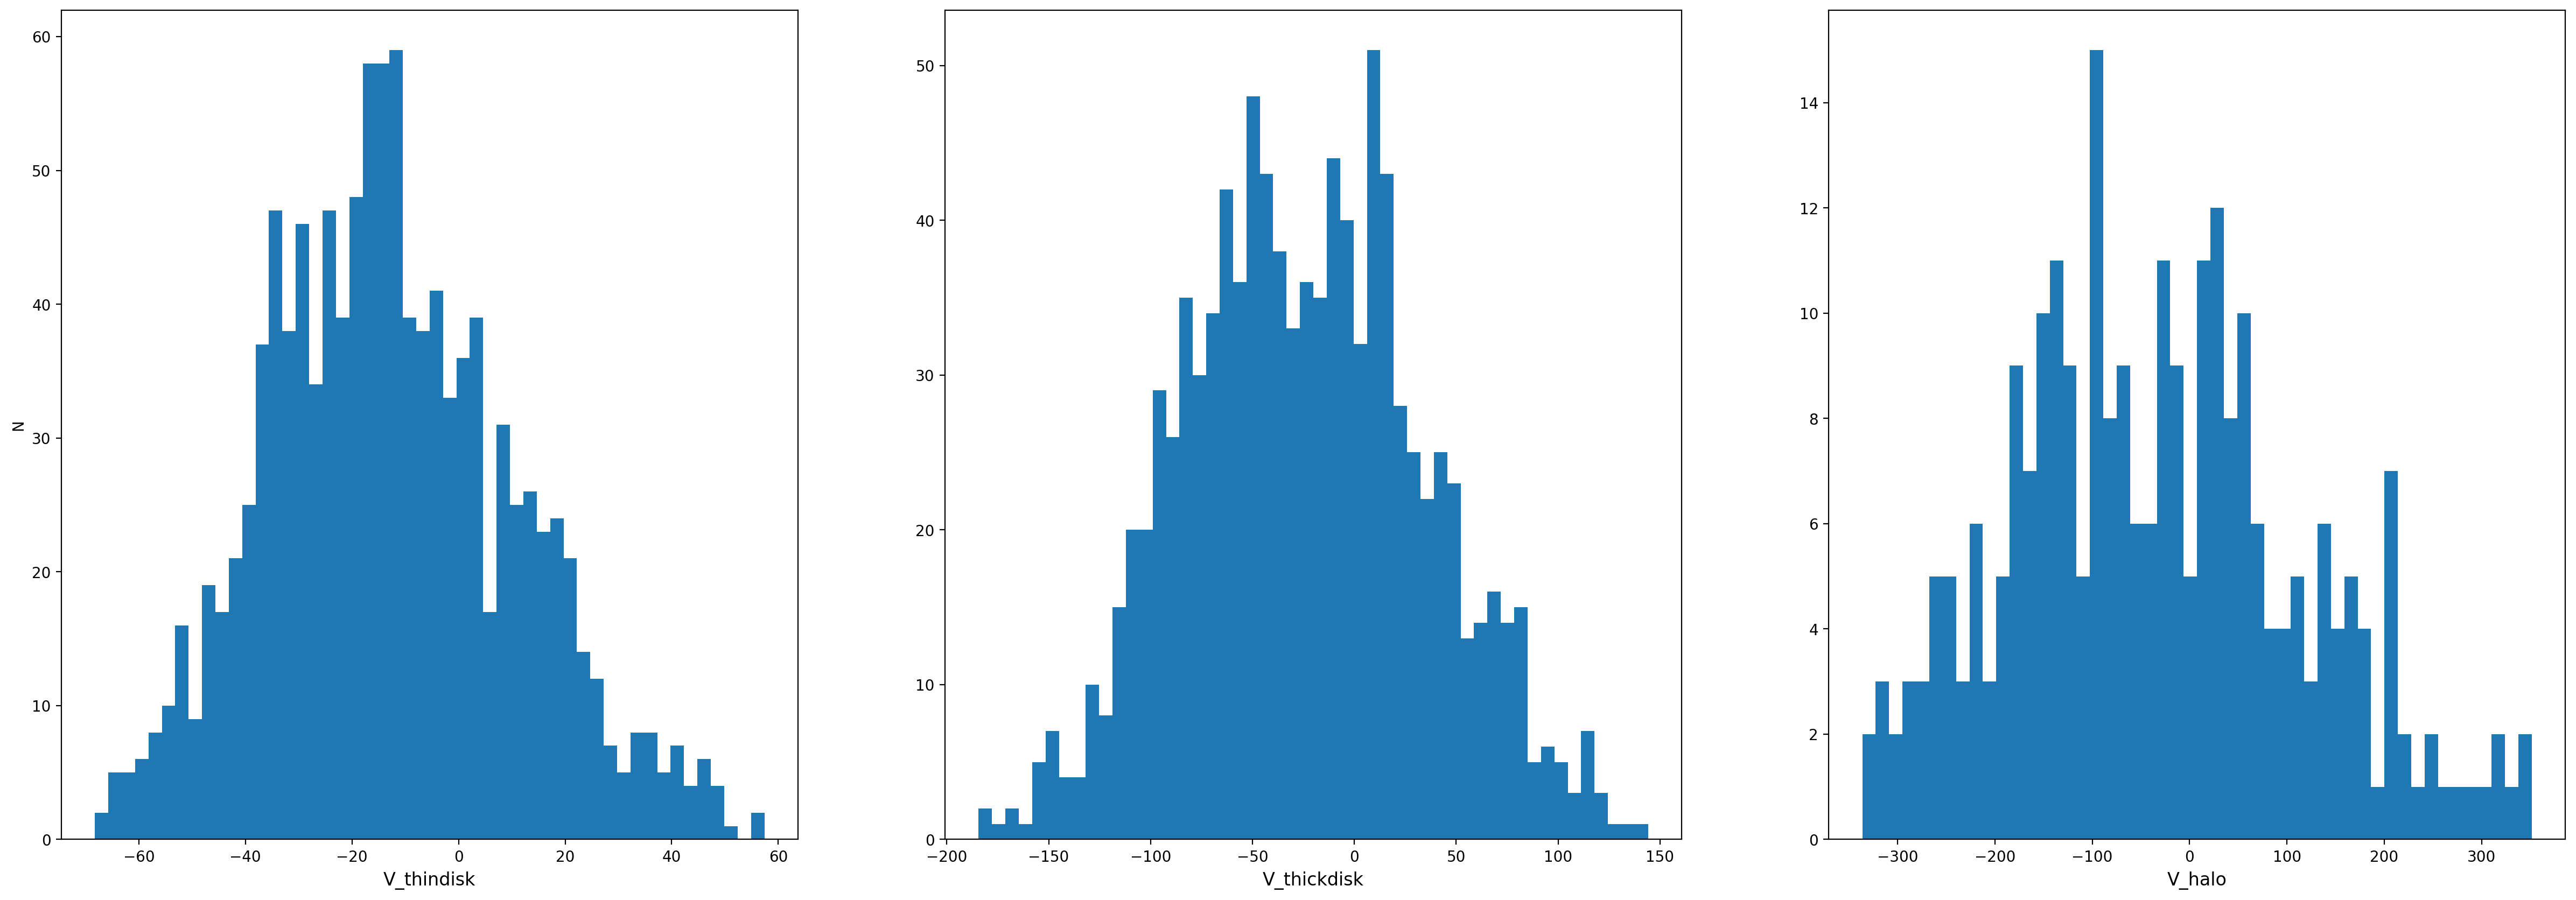

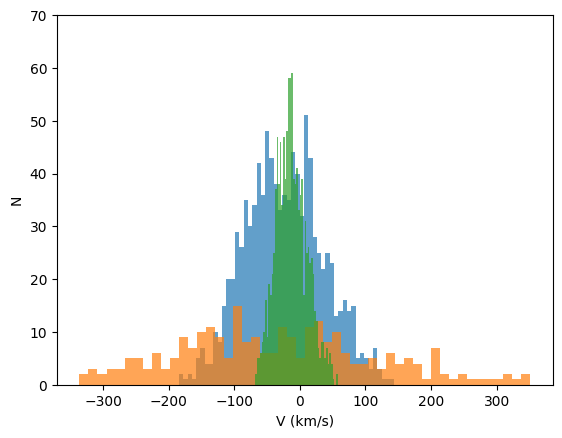

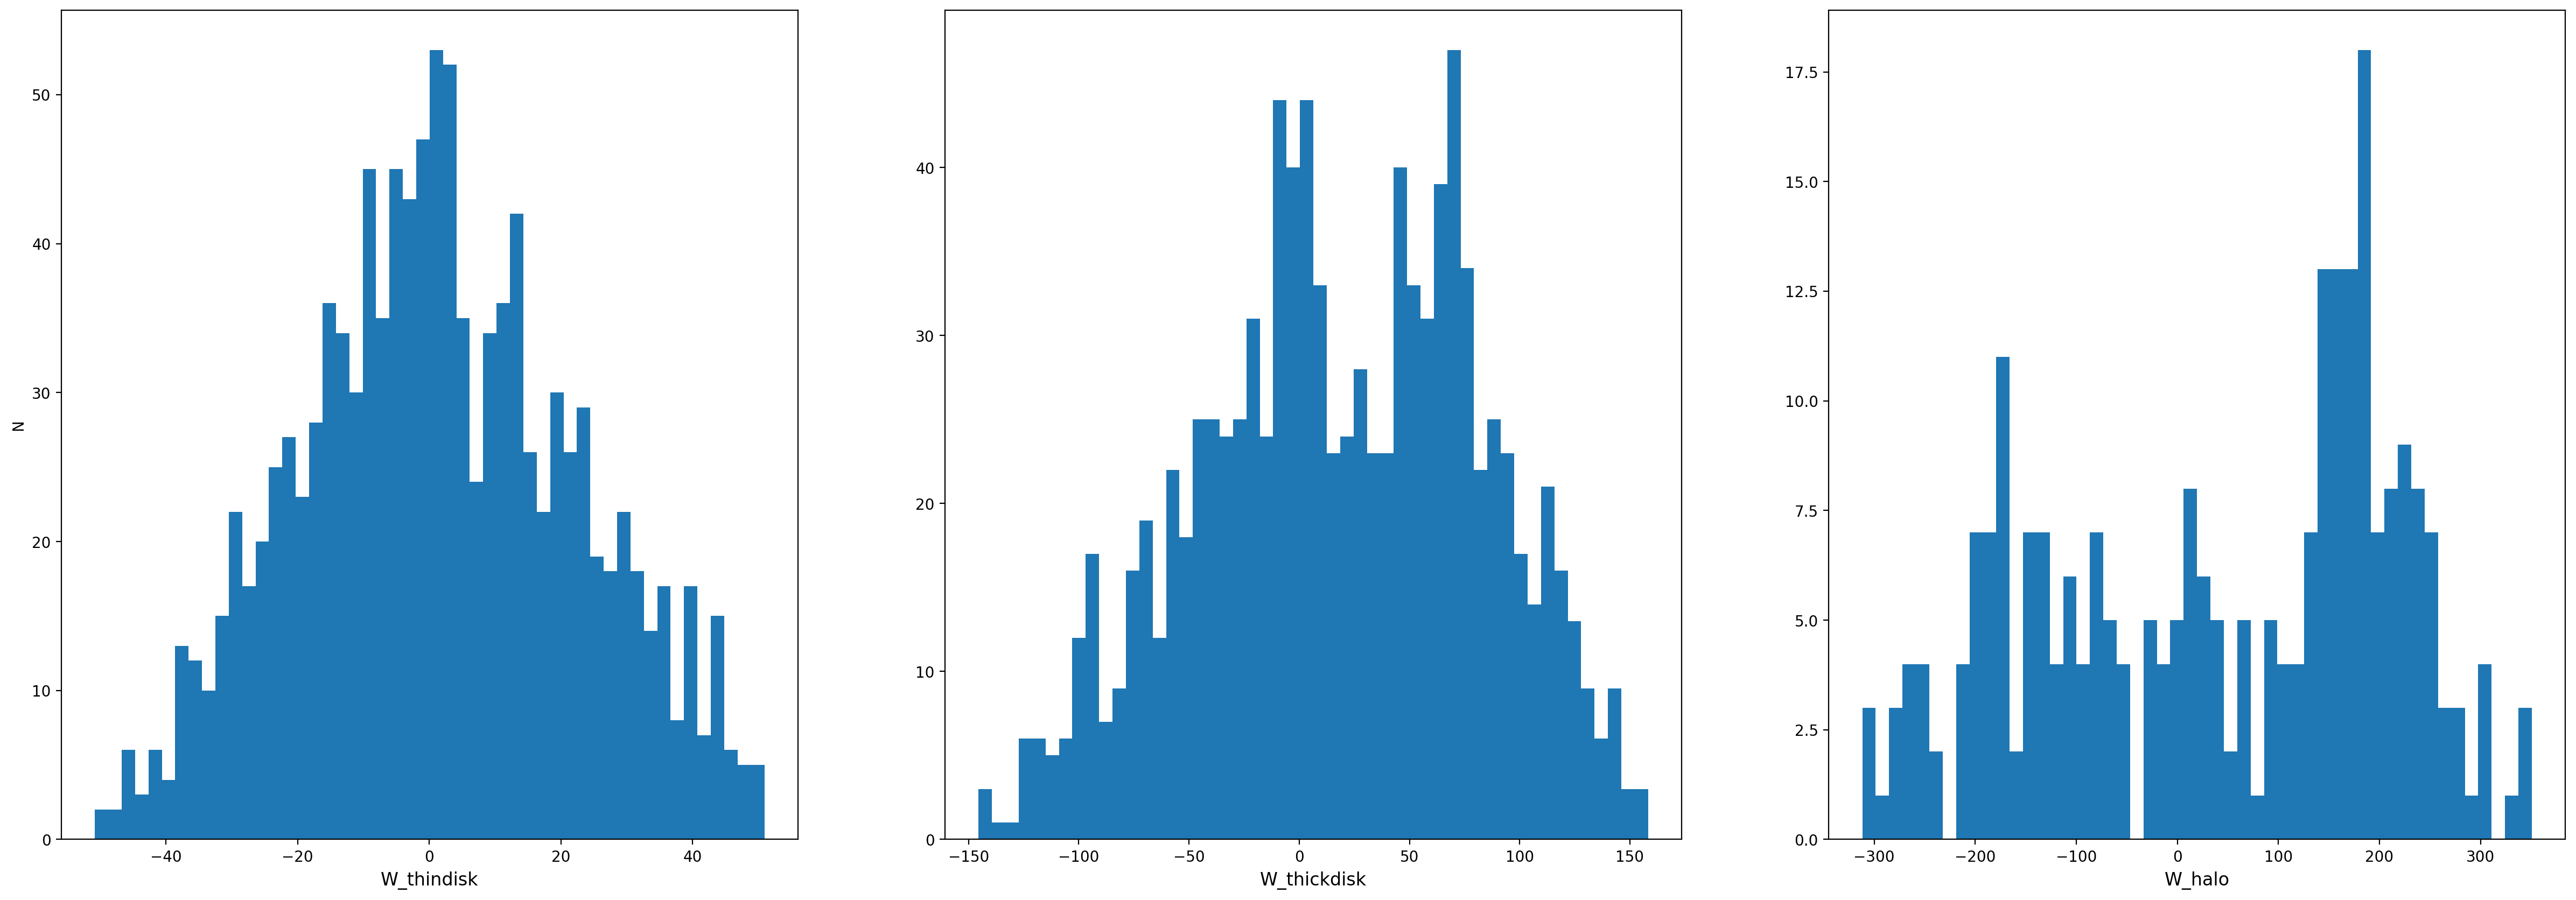

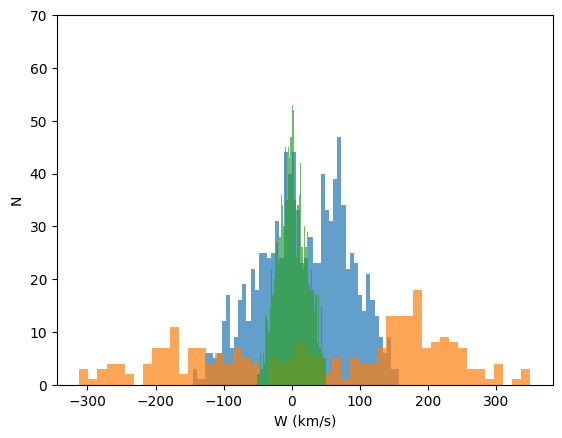

In [ ]:
### HISTROGRAM DISTRIBUSI KECEPATAN U,V,W ###

### 1. U

### plotting terpisah
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(u_d, bins=50)
ax[0].set_xlabel('U_thindisk', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(u_t, bins=50)
ax[1].set_xlabel('U_thickdisk', fontsize=12)

ax[2].hist(u_h, bins=50)
ax[2].set_xlabel('U_halo', fontsize=12)

plt.savefig('Uhist.png')
plt.show()

### plotting semua dalam 1 plot
fig, ax = plt.subplots()

plt.hist(u_t, bins=50, alpha=0.7, label='thick disk')
plt.hist(u_h, bins=50, alpha=0.7, label='halo')
plt.hist(u_d, bins=50, alpha=0.7, label='thin disk')
plt.ylim(0,70)
plt.xlabel('U (km/s)')
plt.ylabel('N')
plt.savefig('Uhist Gab.png', dpi=300)
plt.show()

### 2. V

### plotting terpisah
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(v_d, bins=50)
ax[0].set_xlabel('V_thindisk', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(v_t, bins=50)
ax[1].set_xlabel('V_thickdisk', fontsize=12)

ax[2].hist(v_h, bins=50)
ax[2].set_xlabel('V_halo', fontsize=12)

plt.savefig('Vhist.png')
plt.show()

### plotting semua dalam 1 plot
fig, ax = plt.subplots()

plt.hist(v_t, bins=50, alpha=0.7, label='thick disk')
plt.hist(v_h, bins=50, alpha=0.7, label='halo')
plt.hist(v_d, bins=50, alpha=0.7, label='thin disk')
plt.ylim(0,70)
plt.xlabel('V (km/s)')
plt.ylabel('N')
plt.savefig('Vhist Gab.png', dpi=300)
plt.show()


### 3.W

### plotting terpisah
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(w_d, bins=50)
ax[0].set_xlabel('W_thindisk', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(w_t, bins=50)
ax[1].set_xlabel('W_thickdisk', fontsize=12)

ax[2].hist(w_h, bins=50)
ax[2].set_xlabel('W_halo', fontsize=12)

plt.savefig('Whist.png')
plt.show()

### plotting semua dalam 1 plot
fig, ax = plt.subplots()

plt.hist(w_t, bins=50, alpha=0.7, label='thick disk')
plt.hist(w_h, bins=50, alpha=0.7, label='halo')
plt.hist(w_d, bins=50, alpha=0.7, label='thin disk')
plt.ylim(0,70)
plt.xlabel('W (km/s)')
plt.ylabel('N')
plt.savefig('Whist Gab.png', dpi=300)
plt.show()


**DIAGRAM TOMRE**

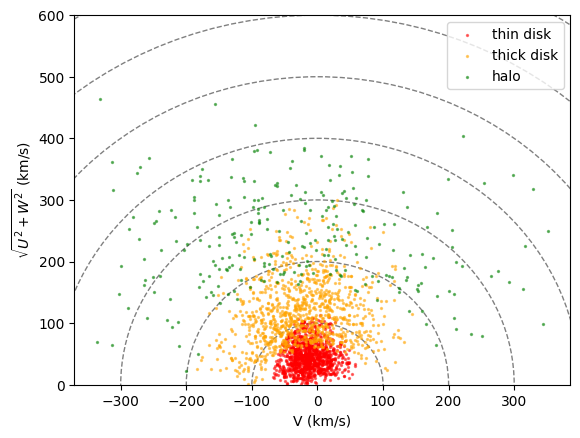

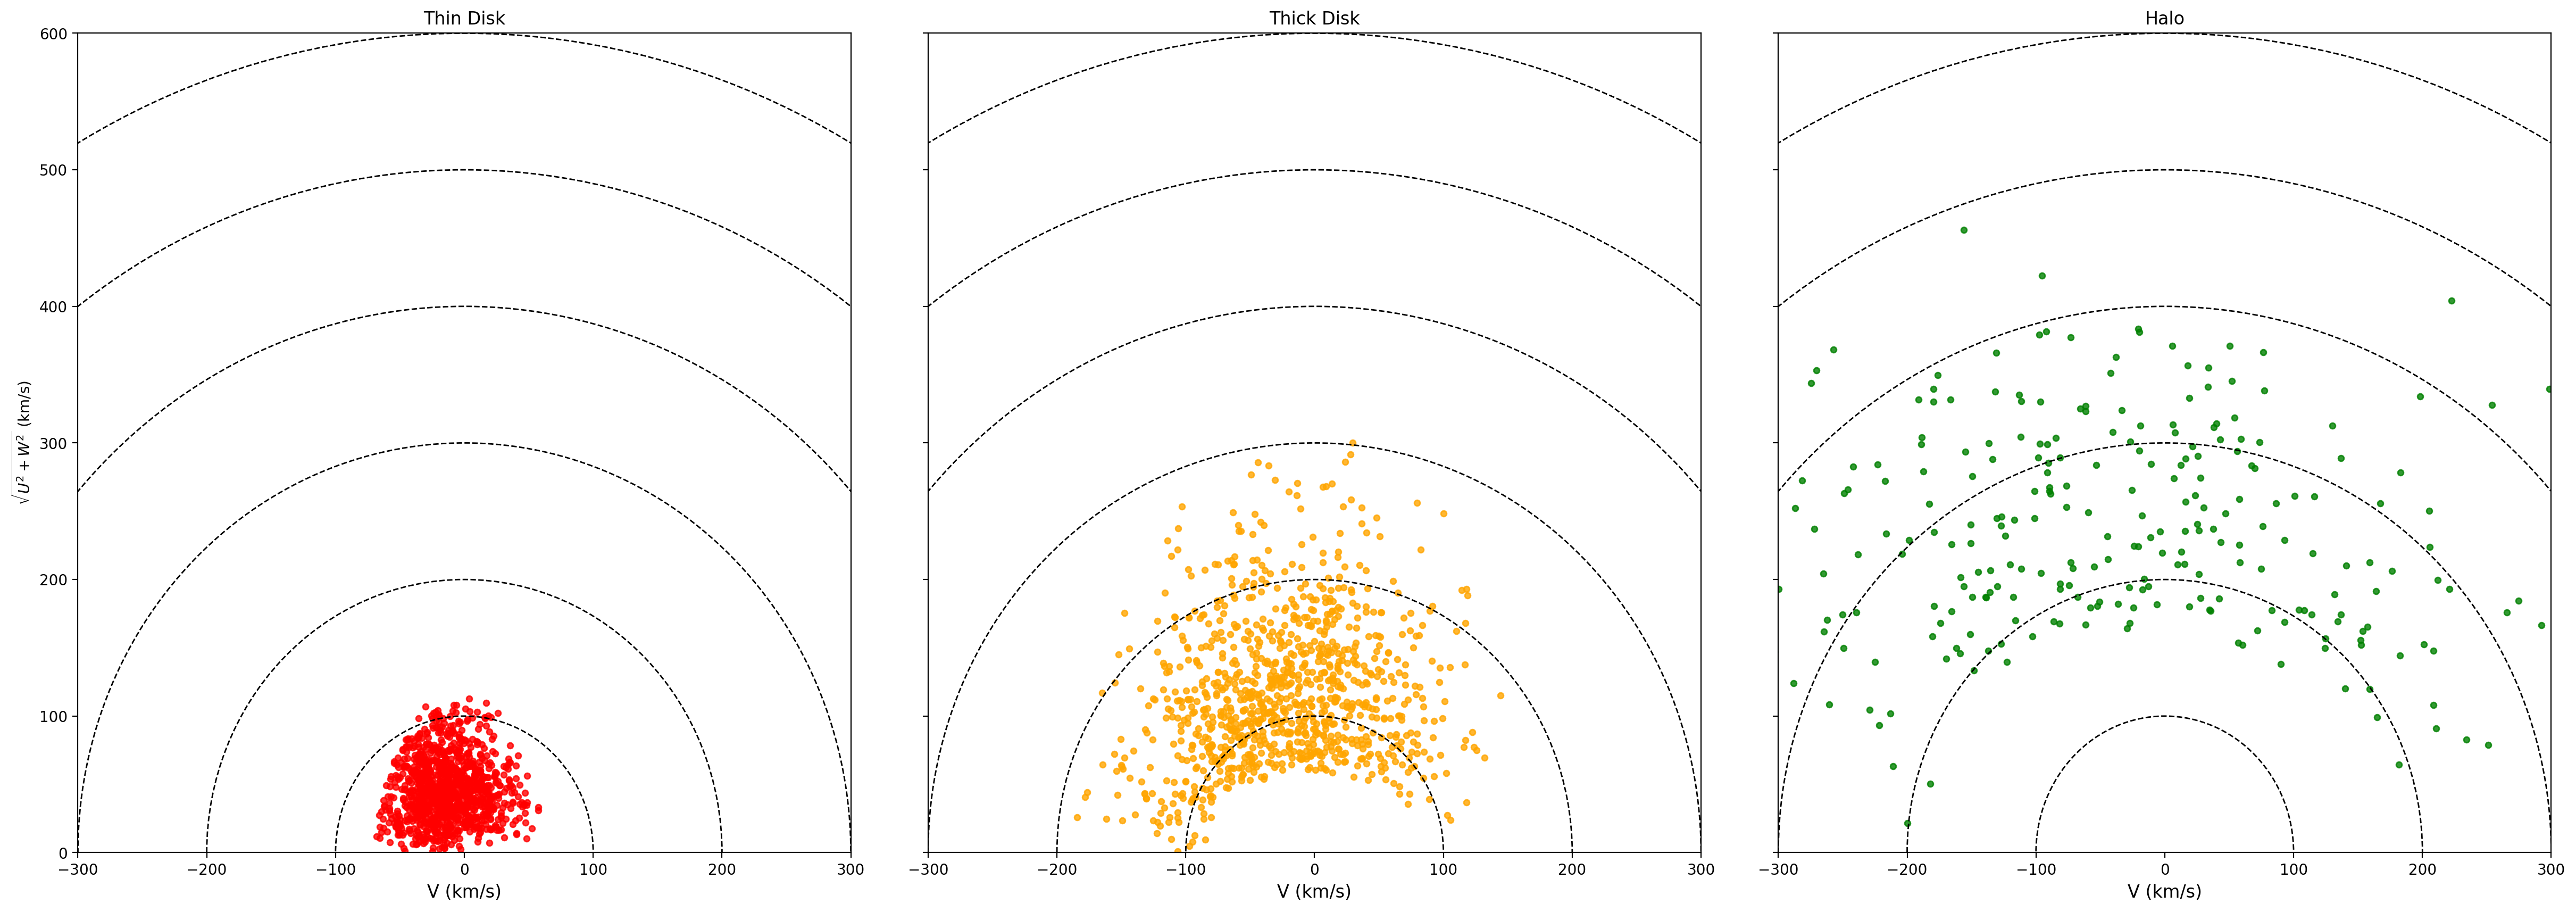

In [ ]:
### sumbu y
def y_toomre_thin(u_d,w_d):
  A1 = (u_d**2 + w_d**2)**(1/2)
  return A1
y_toomre_thin = y_toomre_thin(u_d, w_d)

def y_toomre_thick(u_t,w_t):
  A1 = (u_t**2 + w_t**2)**(1/2)
  return A1
y_toomre_thick = y_toomre_thick(u_t, w_t)

def y_toomre_halo(u_h,w_h):
  A1 = (u_h**2 + w_h**2)**(1/2)
  return A1
y_toomre_halo = y_toomre_halo(u_h, w_h)

### plotting semua dalam 1 plot
fig, ax = plt.subplots()
for i in range(1,8):
    circle1 = plt.Circle((0,0), 100*i, color='grey', linestyle='--', fill=False)
    ax.add_artist(circle1)
plt.scatter(v_d, y_toomre_thin, c='red', s=2, alpha=0.5, label='thin disk')
plt.scatter(v_t, y_toomre_thick, c='orange', s=2, alpha=0.5, label='thick disk')
plt.scatter(v_h, y_toomre_halo, c='green', s=2, alpha=0.5, label='halo')
plt.ylim(0,600)
plt.xlabel('V (km/s)')
plt.ylabel(r'$\sqrt{U^2+W^2}$ (km/s)')
plt.legend()
plt.savefig('toomregabungan.png', dpi=300)
plt.show()

### plotting terpisah
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10), sharey=True)
fig.subplots_adjust(wspace=0.1)

# untuk thin disk
ax[0].scatter(v_d, y_toomre_thin, c='red', s=15, alpha=0.8, label='thin disk')
ax[0].set_xlabel('V (km/s)', fontsize=12)
ax[0].set_ylabel(r'$\sqrt{U^2+W^2}$ (km/s)')
ax[0].title.set_text('Thin Disk')
for i in range(1,8):
    circle1 = plt.Circle((0,0), 100*i, color='black', linestyle='--', fill=False)
    ax[0].add_artist(circle1)
ax[0].set_xlim(-300,300)
ax[0].set_ylim(0,600)

# untuk thick disk
ax[1].scatter(v_t, y_toomre_thick, c='orange', s=15, alpha=0.8, label='thick disk')
ax[1].set_xlabel('V (km/s)', fontsize=12)
ax[1].title.set_text('Thick Disk')
for i in range(1,8):
    circle1 = plt.Circle((0,0), 100*i, color='black', linestyle='--', fill=False)
    ax[1].add_artist(circle1)
ax[1].set_xlim(-300,300)
ax[1].set_ylim(0,600)

# untuk halo
ax[2].scatter(v_h, y_toomre_halo, c='green', s=15, alpha=0.8, label='halo')
ax[2].set_xlabel('V (km/s)', fontsize=12)
ax[2].title.set_text('Halo')
for i in range(1,8):
    circle1 = plt.Circle((0,0), 100*i, color='black', linestyle='--', fill=False)
    ax[2].add_artist(circle1)
ax[2].set_xlim(-300,300)
ax[2].set_ylim(0,600)

plt.savefig('toomresendiri.png')
plt.show()

**PLOT SCATER**

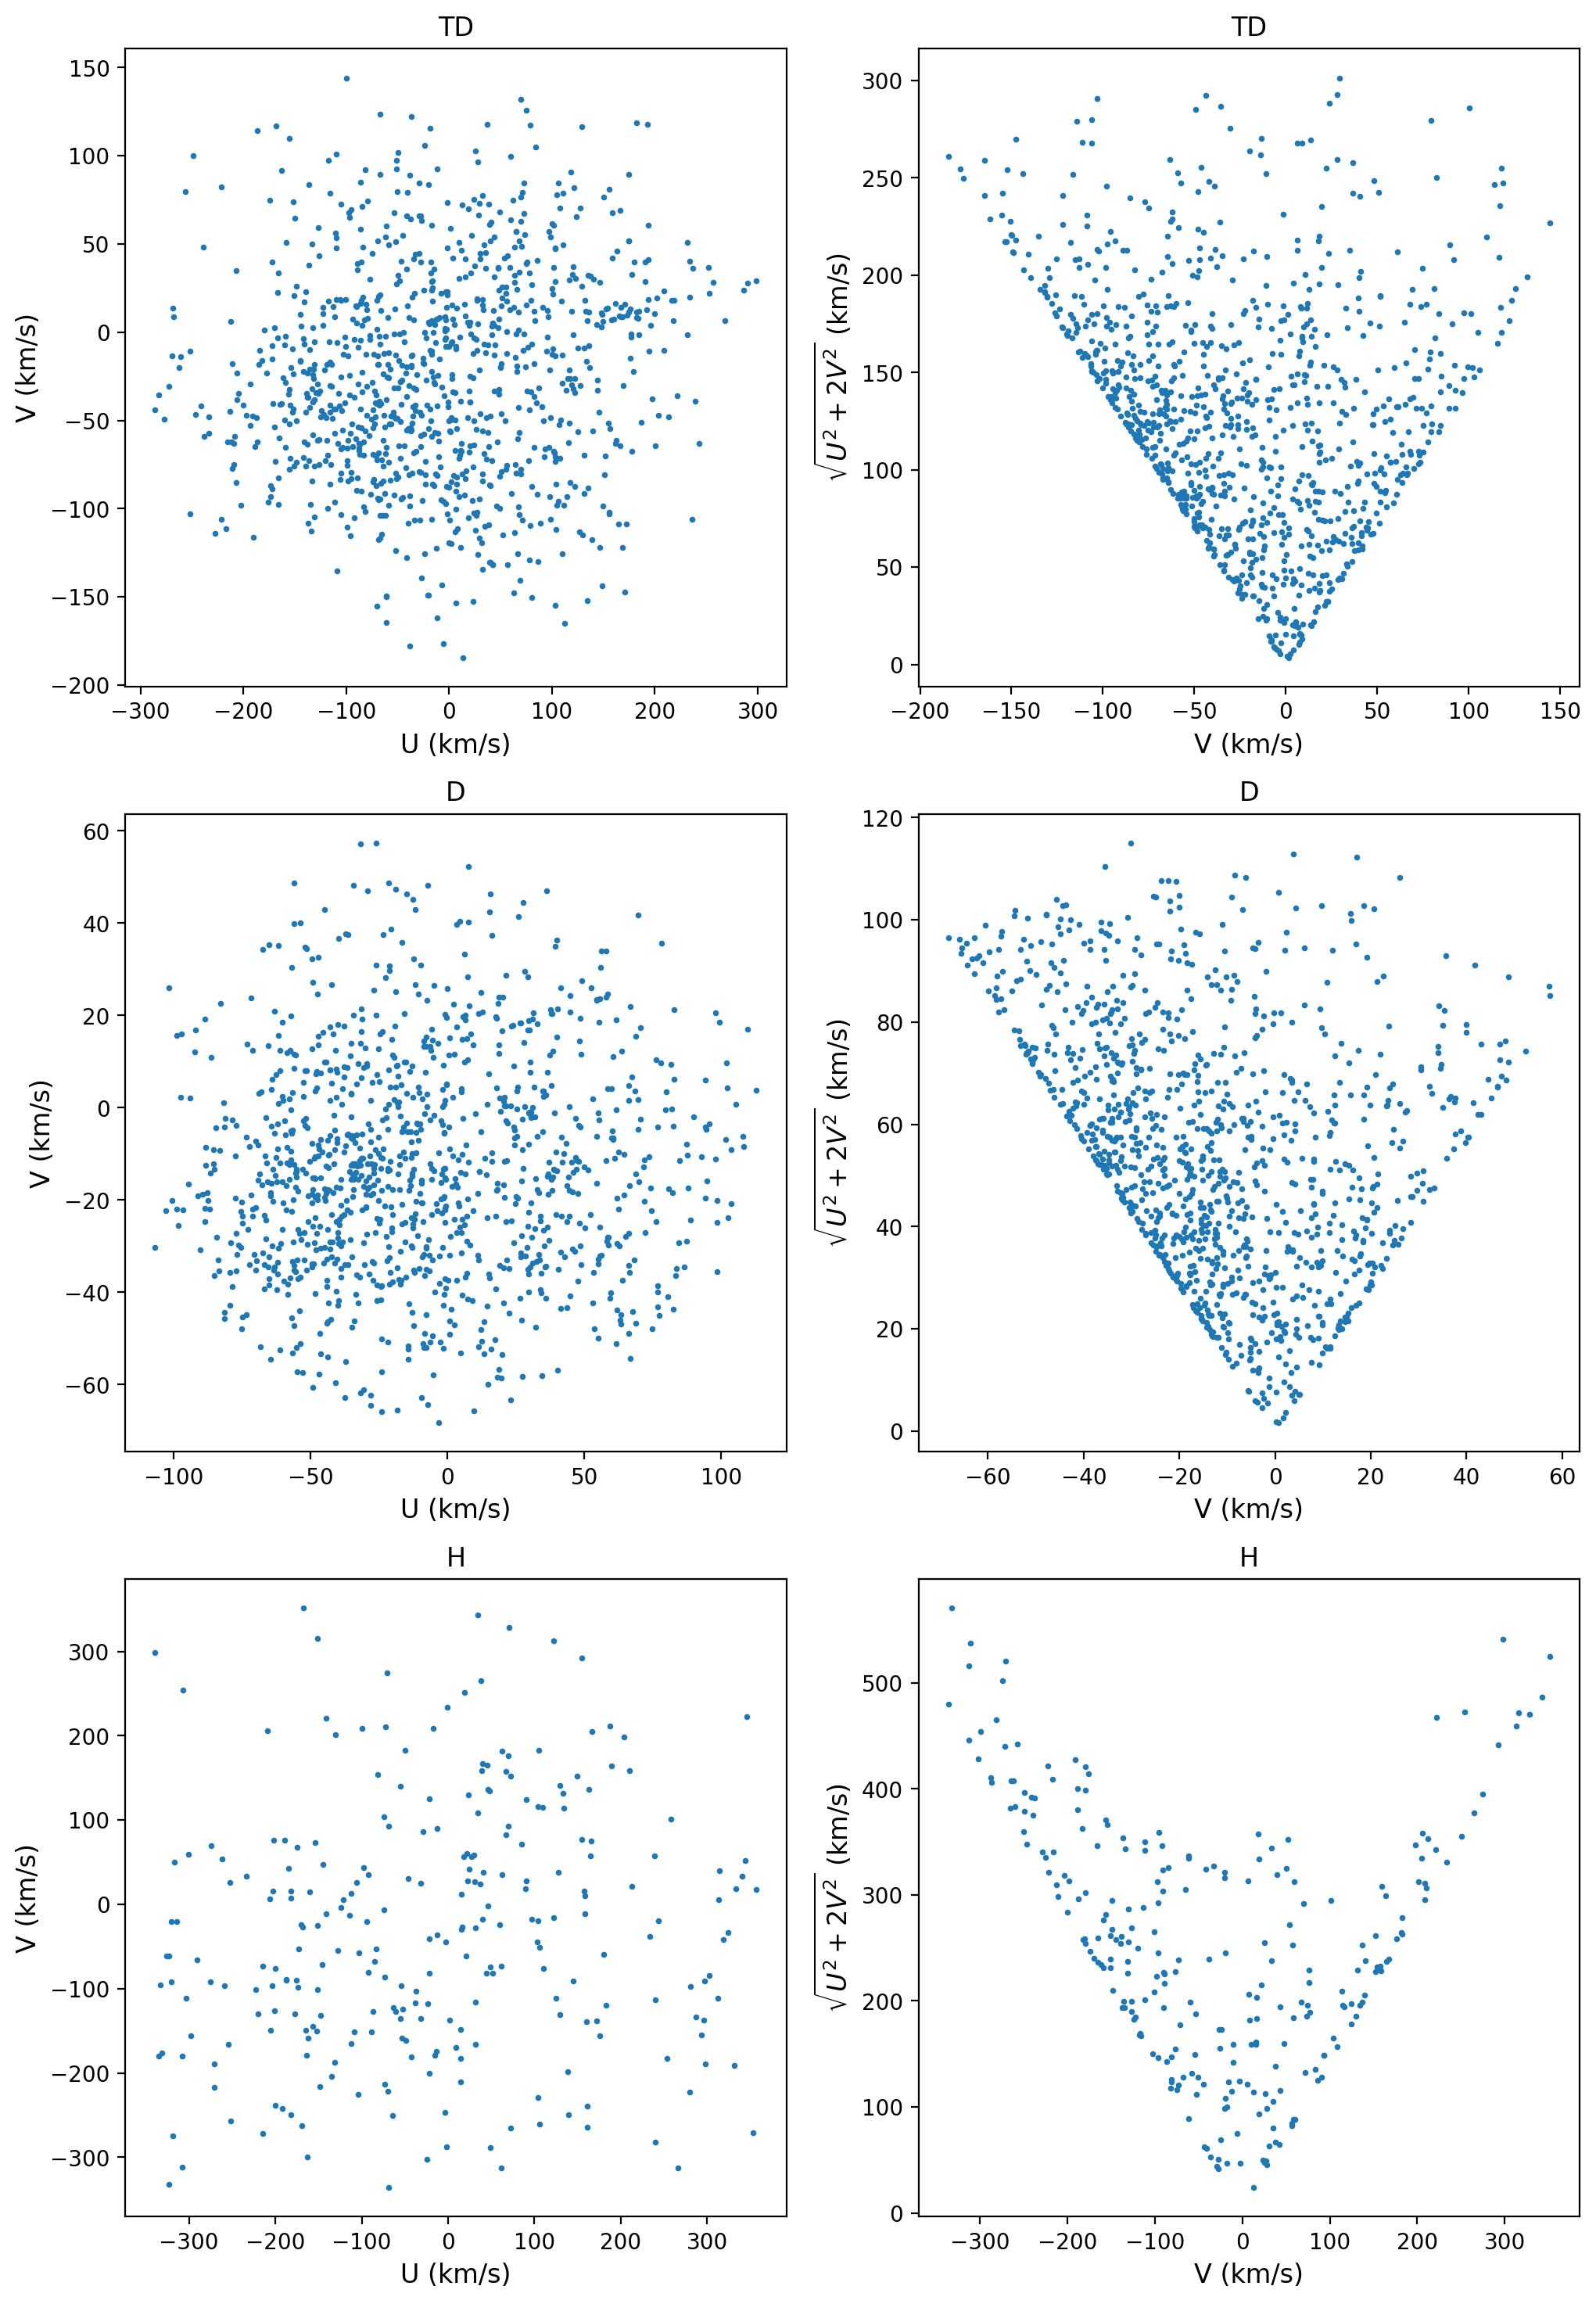

In [ ]:
plt.figure(dpi=200, figsize=(12,18))
# Thick disk (U, V)
plt.subplot(321)
plt.scatter(u_t, v_t,s=3)
plt.xlabel('U (km/s)',fontsize=12)
plt.ylabel('V (km/s)',fontsize=12)
plt.title('TD')

# Thick disk (V, VdelE)
plt.subplot(322)
plt.scatter(v_t,vdele_t,s=3)
plt.xlabel('V (km/s)',fontsize=12)
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)
plt.title('TD')

# Thin disk (U, V)
plt.subplot(323)
plt.scatter(u_d, v_d,s=3)
plt.xlabel('U (km/s)',fontsize=12)
plt.ylabel('V (km/s)',fontsize=12)
plt.title('D')

#Thin disk (V, VdelE)
plt.subplot(324)
plt.scatter(v_d,vdele_d,s=3)
plt.xlabel('V (km/s)',fontsize=12)
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)
plt.title('D')

# Halo (U, V)
plt.subplot(325)
plt.scatter(u_h, v_h,s=3)
plt.xlabel('U (km/s)',fontsize=12)
plt.ylabel('V (km/s)',fontsize=12)
plt.title('H')

# Halo (V, VdelE)
plt.subplot(326)
plt.scatter(v_h,vdele_h,s=3)
plt.xlabel('V (km/s)',fontsize=12)
plt.ylabel(r'$\sqrt{U^2+2V^2}$ (km/s)',fontsize=12)
plt.title('H')

#saving
plt.savefig('scater_all.png')
plt.show()